# Ciencia de datos y BigData<a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

# **Práctica 1: Manejo de Pandas y Análisis Exploratorio**
En esta práctica vamos a aplicar los conocimientos obtenidos en este primer módulo a una base de datos real de la empresa CHEC Grupo EPM.

## **Importación de Librerías**
Importamos las liberías necesarias para el desarrollo de la práctica

In [1]:
import pandas as pd             # manipulación y análisis de datos tabulares
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output
import seaborn as sns
import numpy as np

## **Importación y Exploración Inicial de Datos**
Para esta práctica usaremos un dataset de interrupciones del fluido eléctrico en la red CHEC en algunos circuitos y transformadores, el cual está conformado por las siguientes columnas:
- **`periodo`:** mes al que corresponde
- **`evento`:** ID del evento
- **`equipo_ope`:** equipo que vio la interrupción
- **`tipo_equi_ope`:** tipo de equipo
- **`cto_equi_ope`:** tramo de red al que pertenece el servicio
- **`tipo_elemento`:** relacionado con la tensión a la que opera el equipo
- **`inicio`:** fecha y hora de inicio de la interrupción
- **`fin`:** fecha y hora de finalización de la interrupción
- **`duracion_h`:** duración de la interrupción
- **`tipo_duracion`:** si la interrupción duró más o menos de 3 minutos
- **`causa`:** codificación de la causa de la interrupción
- **`tipo_causa`:** causa que provocó la interrupción
- **`CNT_TRAFOS_AFEC`:** cantidad de trafos afectados
- **`cnt_usus`:** cantidad de usuarios afectados
- **`SAIDI`:** indicador de calidad del servicio por tiempo de falla
- **`SAIFI`:** indicador de calidad del servicio por cantidad de fallas


Estos datos se encuentran en formato CSV, por lo que para cargarlos usaremos la función [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Además, en este caso usaremos algunos parámetros adicionales de acuerdo a la naturaleza de los datos:
- Dado que la columna `evento` corresponde a un indicador único de las interrupciones, dejaremos esta como índice del DataFrame con el parámetro `index_col`.
- Como las columnas `inicio` y `fin` corresponden a fechas, indicaremos que se codifiquen de esta manera, y no como cadenas de texto, con el argumento `parse_dates`.
- Si bien la columna `causa` contiene valores numéricos, estos no deben ser tratados como tal ya que corresponden a causas de interrupciones en las que no hay una noción de orden. Por este motivo se leen como cadenas haciendo uso del parámetro `dtype`.
- Mediante una inspección previa se encontró que en algunas columnas se usan los caracteres `'-'` y `'XXX'` para indicar datos faltantes. Por defecto se leen como valores nulos únicamente los espacios vacíos, pero se pueden indicar valores adicionales a considerar como valores nulos con el argumento `na_values`.


In [3]:
interrupciones = pd.read_csv('databases/interrupciones.csv', index_col='evento',
                             dtype={'causa': str}, parse_dates=['inicio', 'fin'], na_values=['-', 'XXX'])

In [4]:
# @title
@interact(x=(5, 100, 1))
def actualizar(x=5):
    # la función display es para que se muestra la tabla al ser usado
    # .head dentro de una función
    display(interrupciones.head(x))

interactive(children=(IntSlider(value=5, description='x', min=5), Output()), _dom_classes=('widget-interact',)…

Revisamos información general de los datos

In [5]:
interrupciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189639 entries, 7549809 to 8272946
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   periodo          189639 non-null  int64         
 1   equipo_ope       189598 non-null  object        
 2   tipo_equi_ope    189598 non-null  object        
 3   cto_equi_ope     189591 non-null  object        
 4   tipo_elemento    189590 non-null  object        
 5   inicio           189639 non-null  datetime64[ns]
 6   fin              189639 non-null  datetime64[ns]
 7   duracion_h       189639 non-null  float64       
 8   tipo_duracion    189639 non-null  object        
 9   causa            189324 non-null  object        
 10  tipo_causa       189597 non-null  object        
 11  CNT_TRAFOS_AFEC  189639 non-null  int64         
 12  cnt_usus         189639 non-null  int64         
 13  SAIDI            189639 non-null  float64       
 14  SAIFI            1

In [6]:
# @title
# Función para obtener las columnas con valores faltantes
def obtener_columnas_faltantes(df):
    return df.columns[df.isnull().any()].tolist()

# Función interactiva
def verificar_valores_faltantes(df):
    columnas_faltantes = obtener_columnas_faltantes(df)

    # Crear checkboxes para todas las columnas del DataFrame
    checkbox_items = [widgets.Checkbox(value=False, description=col) for col in df.columns]

    # Botón para verificar las columnas seleccionadas
    button = widgets.Button(description="Verificar")

    # Área de salida para mostrar solo un mensaje actualizado
    output = widgets.Output()

    # Función para manejar la acción del botón
    def verificar_seleccion(b):
        seleccionadas = [cb.description for cb in checkbox_items if cb.value]

        with output:
            output.clear_output()  # Limpiar el mensaje anterior
            if set(seleccionadas) == set(columnas_faltantes):
                print("¡Correcto! Seleccionaste todas las columnas con valores faltantes.")
            else:
                print("Incorrecto. Debes seleccionar exactamente las columnas con valores faltante.")

    button.on_click(verificar_seleccion)

    # Mostrar los checkboxes, el botón y el área de salida
    display(*checkbox_items, button, output)

print("Seleccione las columnas en las que hay valores faltantes:")
# Llamar a la función con el DataFrame "interrupciones"
verificar_valores_faltantes(interrupciones)

Seleccione las columnas en las que hay valores faltantes:


Checkbox(value=False, description='periodo')

Checkbox(value=False, description='equipo_ope')

Checkbox(value=False, description='tipo_equi_ope')

Checkbox(value=False, description='cto_equi_ope')

Checkbox(value=False, description='tipo_elemento')

Checkbox(value=False, description='inicio')

Checkbox(value=False, description='fin')

Checkbox(value=False, description='duracion_h')

Checkbox(value=False, description='tipo_duracion')

Checkbox(value=False, description='causa')

Checkbox(value=False, description='tipo_causa')

Checkbox(value=False, description='CNT_TRAFOS_AFEC')

Checkbox(value=False, description='cnt_usus')

Checkbox(value=False, description='SAIDI')

Checkbox(value=False, description='SAIFI')

Button(description='Verificar', style=ButtonStyle())

Output()

## Filtrado del Dataset
En ocasiones no estamos interesados en trabajar con la totalidad del conjunto de datos, sino con algún subconjunto de este que cumpla condiciones específicas.

En este caso, nos centraremos en los registros de interrupciones tales que el tipo de causa es `'NP'` y el tipo de elemento es `'13.2'`.

In [7]:
condicion1 = interrupciones['tipo_causa'] == 'NP'
condicion2 = interrupciones['tipo_elemento'] == '13.2'

In [8]:
condicion1.value_counts()

tipo_causa
True     153267
False     36372
Name: count, dtype: int64

In [9]:
condicion2.value_counts()

tipo_elemento
True     112030
False     77609
Name: count, dtype: int64

Para aplicar varias condiciones a la vez se pueden unir de diferente manera haciendo uso de [operadores booleanos](https://pandas.pydata.org/docs/user_guide/boolean.html#kleene-logical-operations). En este caso queremos que las dos condiciones se cumplan simultáneamente, y esto lo podemos hacer con el operador AND, que en `pandas` se hace con `&`

In [10]:
condiciones = condicion1 & condicion2
condiciones.value_counts()

False    96516
True     93123
Name: count, dtype: int64

In [11]:
# filtramos los datos con las condiciones definidas
interrupciones_fltr = interrupciones[condiciones]

Exploramos esta versión filtrada del dataset

In [12]:
interrupciones_fltr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93123 entries, 7549851 to 8272942
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   periodo          93123 non-null  int64         
 1   equipo_ope       93123 non-null  object        
 2   tipo_equi_ope    93123 non-null  object        
 3   cto_equi_ope     93123 non-null  object        
 4   tipo_elemento    93123 non-null  object        
 5   inicio           93123 non-null  datetime64[ns]
 6   fin              93123 non-null  datetime64[ns]
 7   duracion_h       93123 non-null  float64       
 8   tipo_duracion    93123 non-null  object        
 9   causa            92866 non-null  object        
 10  tipo_causa       93123 non-null  object        
 11  CNT_TRAFOS_AFEC  93123 non-null  int64         
 12  cnt_usus         93123 non-null  int64         
 13  SAIDI            93123 non-null  float64       
 14  SAIFI            93123 non-null  fl

In [13]:
interrupciones_fltr.describe()

,periodo,inicio,fin,duracion_h,CNT_TRAFOS_AFEC,cnt_usus,SAIDI,SAIFI
count,93123.000000,93123,93123,93123.000000,93123.000000,93123.000000,93123.000000,93123.000000
mean,202194.858907,2022-05-15 17:29:04.802852096,2022-05-15 23:13:26.125081856,5.739256,32.187677,556.544914,0.000888,0.001029
min,201901.000000,2019-01-01 02:37:15,2019-01-01 02:40:46,0.000000,1.000000,0.000000,0.000000,0.000000
25%,202103.000000,2021-03-16 06:24:22,2021-03-16 10:38:46,0.237222,2.000000,10.000000,0.000030,0.000019
50%,202210.000000,2022-10-17 08:32:07,2022-10-17 13:45:02,2.166667,7.000000,58.000000,0.000145,0.000108
75%,202309.000000,2023-09-13 17:15:37,2023-09-13 17:37:31,6.366667,45.000000,442.000000,0.000585,0.000814
max,202406.000000,2024-06-30 23:11:25,2024-06-30 23:59:59,392.906667,536.000000,29654.000000,0.165435,0.053018
std,158.190313,NaN,NaN,10.023106,49.872370,1383.112494,0.003073,0.002550


In [14]:
# @title
# Cálculo del valor promedio de la columna cnt_usus en el DataFrame interrupciones_fltr
promedio = interrupciones_fltr['cnt_usus'].mean()

# Creación del widget de entrada
entrada = widgets.FloatText(description="Respuesta:", placeholder="Ingresa el promedio")
boton = widgets.Button(description="Verificar")
resultado = widgets.Output()

# Función que verifica si el valor ingresado es correcto cuando se presiona el botón
def verificar_respuesta(b):
    with resultado:
        resultado.clear_output()  # Limpiar cualquier mensaje anterior
        if abs(entrada.value - promedio) < 0.01:  # Tolerancia pequeña por temas de decimales
            print("¡Correcto!")
        else:
            print(f"Incorrecto.")

# Ligar el botón con la función de verificación
boton.on_click(verificar_respuesta)

# Mostrar la pregunta, el campo de entrada y el botón
display(widgets.HTML(value="<b>¿Cuál es la cantidad promedio de usuarios afectados? (Incluir los primeros dos decimales)</b>"))
display(entrada)
display(boton)
display(resultado)

HTML(value='<b>¿Cuál es la cantidad promedio de usuarios afectados? (Incluir los primeros dos decimales)</b>')

FloatText(value=0.0, description='Respuesta:')

Button(description='Verificar', style=ButtonStyle())

Output()

In [15]:
# @title
# Cálculo del valor máximo de la columna cnt_usus en el DataFrame interrupciones_fltr
maximo = interrupciones_fltr['duracion_h'].max()

# Creación del widget de entrada
entrada = widgets.FloatText(description="Respuesta:", placeholder="Ingresa la máxima duración")
boton = widgets.Button(description="Verificar")
resultado = widgets.Output()

# Función que verifica si el valor ingresado es correcto cuando se presiona el botón
def verificar_respuesta(b):
    with resultado:
        resultado.clear_output()  # Limpiar cualquier mensaje anterior
        if abs(entrada.value - maximo) < 0.1:  # Tolerancia pequeña por temas de decimales
            print("¡Correcto!")
        else:
            print(f"Incorrecto.")

# Ligar el botón con la función de verificación
boton.on_click(verificar_respuesta)

# Mostrar la pregunta, el campo de entrada y el botón
display(widgets.HTML(value="<b>¿Cuál es la máxima duración registrada de una interrupción? (Incluir los primeros dos decimales)</b>"))
display(entrada)
display(boton)
display(resultado)

HTML(value='<b>¿Cuál es la máxima duración registrada de una interrupción? (Incluir los primeros dos decimales…

FloatText(value=0.0, description='Respuesta:')

Button(description='Verificar', style=ButtonStyle())

Output()

In [16]:
interrupciones_fltr.describe(include=['object'])

,equipo_ope,tipo_equi_ope,cto_equi_ope,tipo_elemento,tipo_duracion,causa,tipo_causa
count,93123,93123,93123,93123,93123,92866,93123
unique,7262,2,219,1,2,22,1
top,NSA23L14,interruptor,SNA23L15,13.2,> 3 min,30.0,NP
freq,661,92689,2505,93123,79781,46504,93123


In [17]:
# @title
# Cálculo del número de valores distintos de la columna tipo_equi_ope en el DataFrame interrupciones_fltr
valores_distintos = interrupciones_fltr['tipo_equi_ope'].nunique()

# Creación del widget de entrada
entrada = widgets.IntText(description="Respuesta:", placeholder="Ingresa el número")
boton = widgets.Button(description="Verificar")
resultado = widgets.Output()

# Función que verifica si el valor ingresado es correcto cuando se presiona el botón
def verificar_respuesta(b):
    with resultado:
        resultado.clear_output()  # Limpiar cualquier mensaje anterior
        if entrada.value == valores_distintos:
            print("¡Correcto!")
        else:
            print(f"Incorrecto.")

# Ligar el botón con la función de verificación
boton.on_click(verificar_respuesta)

# Mostrar la pregunta, el campo de entrada y el botón
display(widgets.HTML(value="<b>¿Cuántos tipos de equipo diferentes hay?</b>"))
display(entrada)
display(boton)
display(resultado)

HTML(value='<b>¿Cuántos tipos de equipo diferentes hay?</b>')

IntText(value=0, description='Respuesta:')

Button(description='Verificar', style=ButtonStyle())

Output()

Revisemos ahora las correlaciones de las variables numéricas

In [18]:
interrupciones_num = interrupciones_fltr.select_dtypes([int, float])
interrupciones_cat = interrupciones_fltr.select_dtypes('object')

<Axes: >

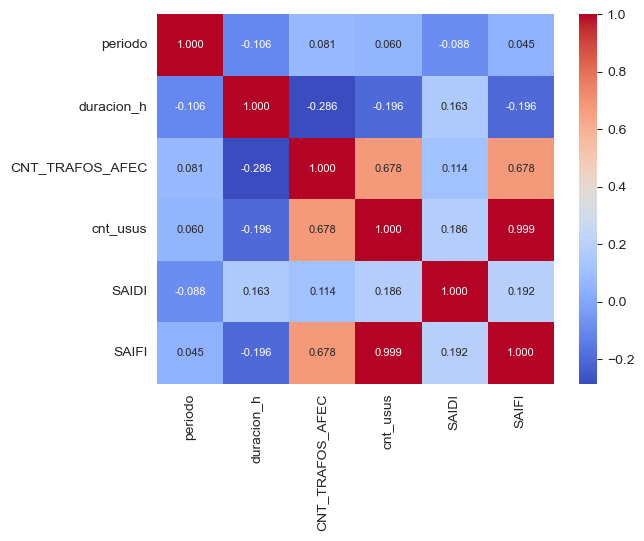

In [19]:
# @title
# con el método .select_dtypes seleccionamos las columnas con los tipos de datos especificados
corr_matrix = interrupciones_num.corr()
sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns.values,  # Etiquetas del eje X
            yticklabels=corr_matrix.columns.values,  # Etiquetas del eje Y
            cmap='coolwarm',  # gama de colores a usar
            annot=True, # mostrar valor en cada casilla
            fmt=".3f",  # redondear valores a 3 decimales
            annot_kws={"size": 8}) # tamaño de valores mostrados en cada casilla

In [20]:
# @title
# Seleccionar las tres variables con mayor correlación positiva con SAIFI
top_2_corr = corr_matrix['SAIFI'].nlargest(3).index[1:]  # Excluir SAIFI mismo

# Creación del widget de entrada
entrada = widgets.Text(description="Respuesta:", placeholder="Ingresa las 2 variables separadas por comas",
                       layout=widgets.Layout(width='500px'))
boton = widgets.Button(description="Verificar")
resultado = widgets.Output()

# Función que verifica si el valor ingresado es correcto cuando se presiona el botón
def verificar_respuesta(b):
    with resultado:
        resultado.clear_output()  # Limpiar cualquier mensaje anterior
        respuesta_ingresada = [var.strip() for var in entrada.value.split(',')]
        if set(respuesta_ingresada) == set(top_2_corr):
            print("¡Correcto!")
        else:
            print(f"Incorrecto.")

# Ligar el botón con la función de verificación
boton.on_click(verificar_respuesta)

# Mostrar la pregunta, el campo de entrada y el botón
display(widgets.HTML(value="<b>¿Cuáles son las 2 variables que tienen mayor correlación positiva con SAIFI?</b>"))
display(widgets.HTML(value="<i>Por favor, ingresa los nombres de las variables tal cual están escritas, separados por comas.</i>"))
display(entrada)
display(boton)
display(resultado)

HTML(value='<b>¿Cuáles son las 2 variables que tienen mayor correlación positiva con SAIFI?</b>')

HTML(value='<i>Por favor, ingresa los nombres de las variables tal cual están escritas, separados por comas.</…

Text(value='', description='Respuesta:', layout=Layout(width='500px'), placeholder='Ingresa las 2 variables se…

Button(description='Verificar', style=ButtonStyle())

Output()

In [21]:
# @title
# Función para actualizar el gráfico
def actualizar_grafico(columna):
    plt.figure(figsize=(10, 6))

    # Contar las ocurrencias de las categorías
    counts = interrupciones_cat[columna].value_counts()

    # Si hay más de 20 categorías, agrupar las demás bajo "otros"
    if len(counts) > 20:
        top_20 = counts[:20]
    else:
        top_20 = counts

    # Graficar las 20 más frecuentes (incluyendo "otros" si aplica)
    top_20.plot(kind='bar')

    plt.title(f'Frecuencia de categorías en {columna}')
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

# Widget de selección para elegir la columna categórica
selector_columna = widgets.Dropdown(
    options=interrupciones_cat.columns,
    description='Columna:',
    style={'description_width': 'initial'}
)

# Llamada a la función interactiva
widgets.interact(actualizar_grafico, columna=selector_columna)

interactive(children=(Dropdown(description='Columna:', options=('equipo_ope', 'tipo_equi_ope', 'cto_equi_ope',…

<function __main__.actualizar_grafico(columna)>

In [22]:
# @title
top_3_causas =  interrupciones_fltr['causa'].value_counts()[:3].index

# Creación del widget de entrada
entrada = widgets.Text(description="Respuesta:", placeholder="Ingresa las 3 causas separadas por comas, sin decimales",
                       layout=widgets.Layout(width='500px'))
boton = widgets.Button(description="Verificar")
resultado = widgets.Output()

# Función que verifica si el valor ingresado es correcto cuando se presiona el botón
def verificar_respuesta(b):
    with resultado:
        resultado.clear_output()  # Limpiar cualquier mensaje anterior
        respuesta_ingresada = [var.strip() for var in entrada.value.split(',')]
        if set(respuesta_ingresada) == set(causa.replace(".0", "") for causa in top_3_causas):
            print("¡Correcto!")
        else:
            print(f"Incorrecto.")

# Ligar el botón con la función de verificación
boton.on_click(verificar_respuesta)

# Mostrar la pregunta, el campo de entrada y el botón
display(widgets.HTML(value="<b>¿Cuáles son las 3 causas más frecuentes?</b>"))
display(widgets.HTML(value="<i>Por favor, ingresa las causas sin decimales, separados por comas.</i>"))
display(entrada)
display(boton)
display(resultado)

HTML(value='<b>¿Cuáles son las 3 causas más frecuentes?</b>')

HTML(value='<i>Por favor, ingresa las causas sin decimales, separados por comas.</i>')

Text(value='', description='Respuesta:', layout=Layout(width='500px'), placeholder='Ingresa las 3 causas separ…

Button(description='Verificar', style=ButtonStyle())

Output()

## Escala logarítmica

La [escala logarítmica](https://en.wikipedia.org/wiki/Logarithmic_scale) muestra valores en potencias de 10 (u otra base). En gráficas como histogramas, se usa para visualizar mejor datos que varían en varios órdenes de magnitud, resaltando tanto valores pequeños como grandes.

En nuestro caso encontramos frecuencias de repetición que varían en orden de magnitud entre distintos rangos de valores. La mayoría de funciones para generar visualizaciones cuentan con argumentos para usar escala logarítmica en una o varias dimensiones.

In [23]:
# @title
# Función para generar el histograma
def matplotlib_histograma(column_name, bins, log_scale):
    plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
    data = interrupciones_fltr.select_dtypes([float, int])[column_name]

    # Crear el histograma
    plt.hist(data, bins=bins, color='blue', edgecolor='black', log=log_scale)

    # Añadir título y etiquetas
    plt.title(f'Histograma del {column_name}')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Frecuencia (log)' if log_scale else 'Frecuencia')

    # Mostrar el histograma
    plt.show()

# Dropdown para seleccionar la columna
column_dropdown = widgets.Dropdown(
    options=interrupciones_num.columns.tolist(),
    value=interrupciones_num.columns[1],
    description='Columna:',
)

# Slider para seleccionar el número de bins
bins_slider = widgets.IntSlider(
    value=30,
    min=1,
    max=100,
    step=5,
    description='Bins:',
    continuous_update=False
)

# Checkbox para escala logarítmica
log_scale_checkbox = widgets.Checkbox(
    value=False,
    description='Escala Logarítmica',
    style={'description_width': 'initial'}
)

# Mostrar el widget y la gráfica interactiva
widgets.interactive(matplotlib_histograma, column_name=column_dropdown, bins=bins_slider, log_scale=log_scale_checkbox)

interactive(children=(Dropdown(description='Columna:', index=1, options=('periodo', 'duracion_h', 'CNT_TRAFOS_…

Ahora veamos cómo se distribuyen conjuntamente un par de variables, discriminando una tercera. En la gráfica podemos ver el número usuarios afectados contrastado con el número de trafos, diferenciándo las interrupciones con duración mayor y menor a 3 minutos.

In [24]:
# @title
def kde_plot(df, x_var, y_var, category_var):
    fig = plt.figure(figsize=(10, 7))
    gs = fig.add_gridspec(3, 3, width_ratios=[3, 0.1, 0.5], height_ratios=[0.5, 0.1, 3])  # Ajustar el tamaño relativo

    # Crear los ejes para el gráfico principal y las distribuciones marginales
    ax_main = fig.add_subplot(gs[2:, :-1])  # Gráfico principal
    ax_right = fig.add_subplot(gs[2:, -1], sharey=ax_main)  # Distribución marginal derecha
    ax_top = fig.add_subplot(gs[0, :-1], sharex=ax_main)  # Distribución marginal superior

    # Graficar el KDE principal
    sns.kdeplot(
        data=df,
        x=x_var,
        y=y_var,
        hue=category_var,
        fill=True,
        common_norm=False,
        palette="Set2",
        ax=ax_main,
        alpha=0.3# Aplicar escala logarítmica
    )
    sns.scatterplot(
        data=df,
        x=x_var,
        y=y_var,
        hue=category_var,
        ax=ax_main,
        palette="Set2",
        s=10
    )
    # Agregar las distribuciones marginales con ajustes en tamaño
    sns.kdeplot(data=df, x=x_var, palette="Set2", hue=category_var, common_norm=False, alpha=0.5, ax=ax_top, legend=False)
    sns.kdeplot(data=df, y=y_var, palette="Set2", hue=category_var, common_norm=False, ax=ax_right, legend=False)

    # Apagar los ejes de las distribuciones marginales
    ax_top.axis("off")
    ax_right.axis("off")

    # Personalizar el gráfico principal
    ax_main.set_xlabel(f"{x_var}")
    ax_main.set_ylabel(f"{y_var}")
    ax_main.set_title(f"Distribución de {x_var} vs {y_var}")

    # Agregar la leyenda manualmente
    handles, labels = ax_main.get_legend_handles_labels()
    if handles:  # Si se encuentran handles, agregar la leyenda
        ax_main.legend(handles=handles, labels=labels, title=category_var, loc='best', framealpha=1.0)

    # Ajustar el diseño y mostrar
    plt.tight_layout()
    plt.show()

La función que realiza la siguiente gráfica es computacionalmente costosa. Para nuestros fines, es suficiente con tomar una muestra del total de datos para realizar la gráfica.

In [25]:
# Filtrar las filas de la clase menos común
df_min_class = interrupciones_fltr[interrupciones_fltr['tipo_duracion'] == '> 3 min'].sample(n=1000, random_state=23)

# Submuestrear la clase más común
df_max_class = interrupciones_fltr[interrupciones_fltr['tipo_duracion'] == '<= 3 min'].sample(n=1000, random_state=42)

# Combinar ambas clases en un nuevo DataFrame
df_balanced = pd.concat([df_min_class, df_max_class])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

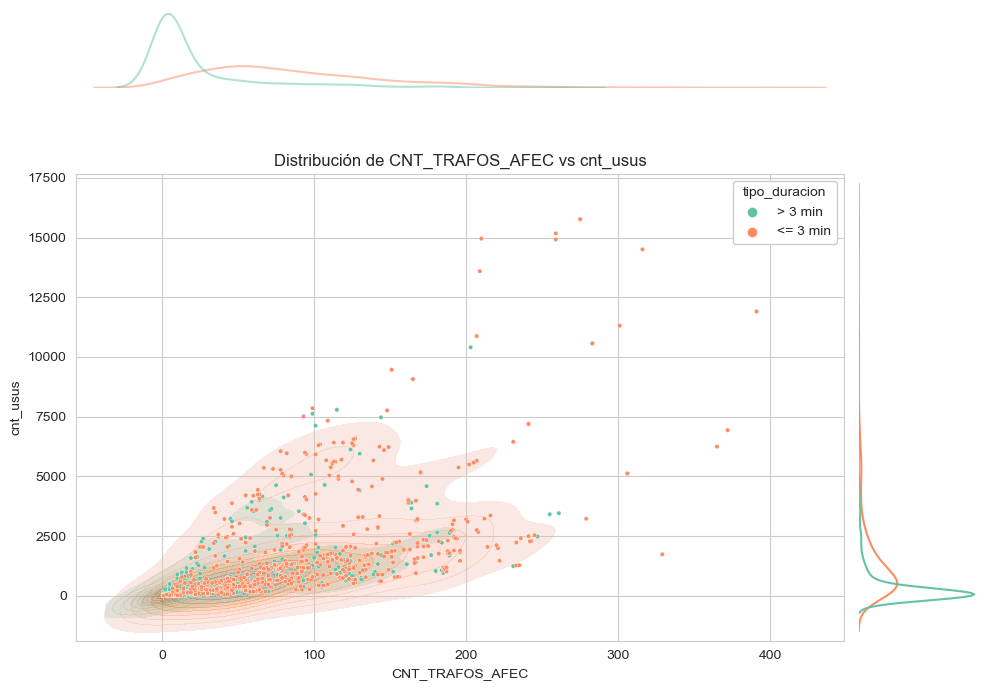

In [26]:
kde_plot(df_balanced, 'CNT_TRAFOS_AFEC', 'cnt_usus', 'tipo_duracion')

¿Qué puede decir al respecto?

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).